In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("credit_risk.csv")
df.head()

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
0,0,22,59000,RENT,123.0,PERSONAL,35000,16.02,1,0.59,Y,3
1,1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
2,2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3
3,3,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2
4,4,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4


In [ ]:
df.shape

(32581, 12)

In [ ]:
df.drop_duplicates(inplace=True)
df = df.reset_index(drop=True)#Resetting the index to make it continuous
df.shape

(32581, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              32581 non-null  int64  
 1   Age             32581 non-null  int64  
 2   Income          32581 non-null  int64  
 3   Home            32581 non-null  object 
 4   Emp_length      31686 non-null  float64
 5   Intent          32581 non-null  object 
 6   Amount          32581 non-null  int64  
 7   Rate            29465 non-null  float64
 8   Status          32581 non-null  int64  
 9   Percent_income  32581 non-null  float64
 10  Default         32581 non-null  object 
 11  Cred_length     32581 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 3.0+ MB


In [ ]:
df.describe()

,Id,Age,Income,Emp_length,Amount,Rate,Status,Percent_income,Cred_length
count,32581.000000,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,16290.006139,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,9405.479594,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,0.000000,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,8145.000000,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,16290.000000,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,24435.000000,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,32780.000000,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [ ]:
df.drop("Id",axis=1,inplace=True)

In [ ]:
df.describe()

,Age,Income,Emp_length,Amount,Rate,Status,Percent_income,Cred_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [ ]:
## if age greater than 80 exsist remove them and same goes for employment length which ideally should not cross 60 years at maximum.
## Age is directly proportional to cred_length
## loan was applied by people having income below than $100k
# We can also see Income have outliers.

In [ ]:
age_limit = df[df['Age']>80]
age_limit

,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
81,144,250000,RENT,4.0,VENTURE,4800,13.57,0,0.02,N,3
183,144,200000,MORTGAGE,4.0,EDUCATION,6000,11.86,0,0.03,N,2
575,123,80004,RENT,2.0,EDUCATION,20400,10.25,0,0.25,N,3
747,123,78000,RENT,7.0,VENTURE,20000,NaN,0,0.26,N,4
32297,144,6000000,MORTGAGE,12.0,PERSONAL,5000,12.73,0,0.00,N,25
32416,94,24000,RENT,1.0,MEDICAL,6500,NaN,0,0.27,N,27
32506,84,94800,MORTGAGE,2.0,PERSONAL,10000,7.51,0,0.11,N,24


In [ ]:
value_to_drop = 80
df.drop(df[df['Age'] > value_to_drop].index, inplace=True)

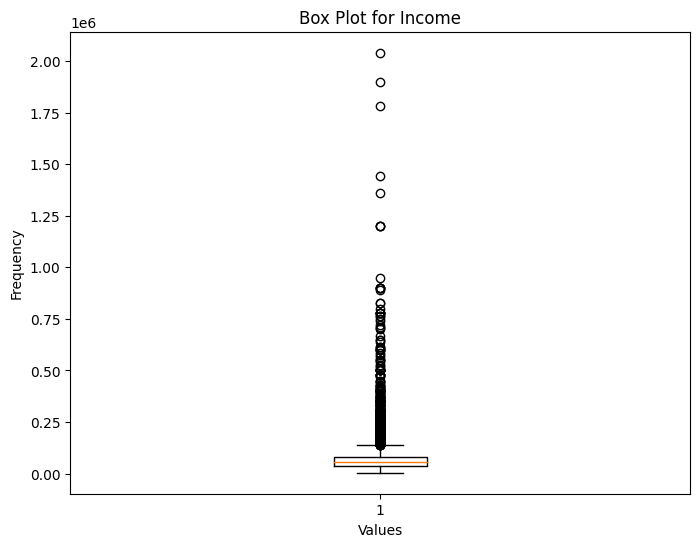

In [ ]:
data = df['Income']

# Create a box plot
plt.figure(figsize=(8, 6))  # Optional: Adjust the figure size
plt.boxplot(data)

# Add title and labels
plt.title('Box Plot for {}'.format('Income'))
plt.xlabel('Values')
plt.ylabel('Frequency')

# Show the plot
plt.show()

There is concentration of outliers above the income of 25000

In [ ]:
#Checking for people with approved loan and having a history of default with mean of Income 600K
high_income_with_default=df[(df['Income']>120000)&(df['Status']==1)&(df['Default']=='Y')].shape
Set=tuple(high_income_with_default)
print("No of people having income greater than 120k with previous default:",Set[0])

No of people having income greater than 120k with previous default: 94


In [ ]:
#Checking for people having approval for loan and not having any prevoius default history
high_income_no_default=df[(df['Income']>120000)&(df['Status']==1)&(df['Default']=='N')].shape
Set=tuple(high_income_no_default)
print("No of people having income greater than 120k with previous default:",Set[0])

No of people having income greater than 120k with previous default: 133


In [ ]:
df[df['Income']>600000]

,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
17833,32,1200000,MORTGAGE,1.0,VENTURE,12000,7.51,0,0.01,N,8
17834,34,948000,MORTGAGE,18.0,PERSONAL,2000,9.99,0,0.00,N,7
17840,35,648000,MORTGAGE,6.0,PERSONAL,10000,17.19,1,0.02,Y,8
18635,31,636000,RENT,2.0,DEBTCONSOLIDATION,17500,11.48,0,0.03,N,10
21462,33,612000,RENT,3.0,DEBTCONSOLIDATION,5950,12.73,0,0.01,Y,9
23431,30,648000,RENT,NaN,DEBTCONSOLIDATION,8000,12.73,0,0.01,Y,10
25714,32,703800,RENT,14.0,MEDICAL,12000,15.33,1,0.01,Y,9
27881,28,604000,MORTGAGE,12.0,PERSONAL,25000,9.01,1,0.04,N,9
27882,31,741600,MORTGAGE,3.0,MEDICAL,12000,10.25,0,0.02,N,6
27883,32,750000,MORTGAGE,2.0,DEBTCONSOLIDATION,30000,9.91,0,0.04,N,8


The number of people having higher income than 120k and having loan approval with or without the history of Default is not very Minute so not removing the outliers is a very better option except the people with income above 1 million and while having very less employment length and percent income it self is not understandable here with no previous defaults high credit length and not having approval more info is required here.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32574 entries, 0 to 32580
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             32574 non-null  int64  
 1   Income          32574 non-null  int64  
 2   Home            32574 non-null  object 
 3   Emp_length      31679 non-null  float64
 4   Intent          32574 non-null  object 
 5   Amount          32574 non-null  int64  
 6   Rate            29460 non-null  float64
 7   Status          32574 non-null  int64  
 8   Percent_income  32574 non-null  float64
 9   Default         32574 non-null  object 
 10  Cred_length     32574 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 3.0+ MB


In [ ]:
employ_limit =  df[df['Emp_length']>60]
employ_limit

,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
0,22,59000,RENT,123.0,PERSONAL,35000,16.02,1,0.59,Y,3
210,21,192000,MORTGAGE,123.0,VENTURE,20000,6.54,0,0.10,N,4


In [ ]:
value_to_drop = 60
df.drop(df[df['Emp_length'] > value_to_drop].index, inplace=True)


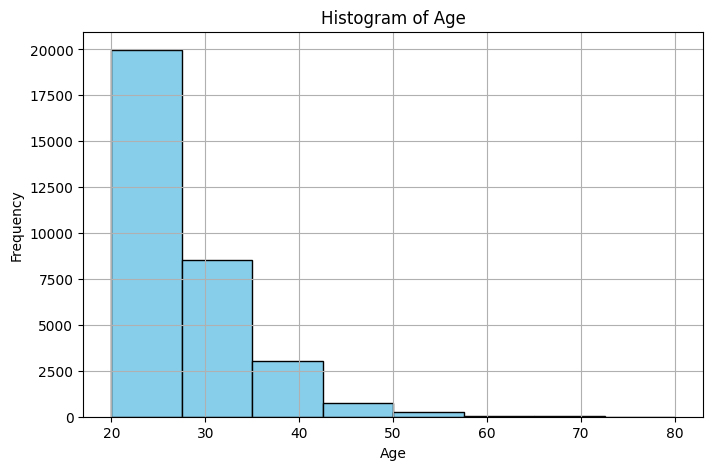

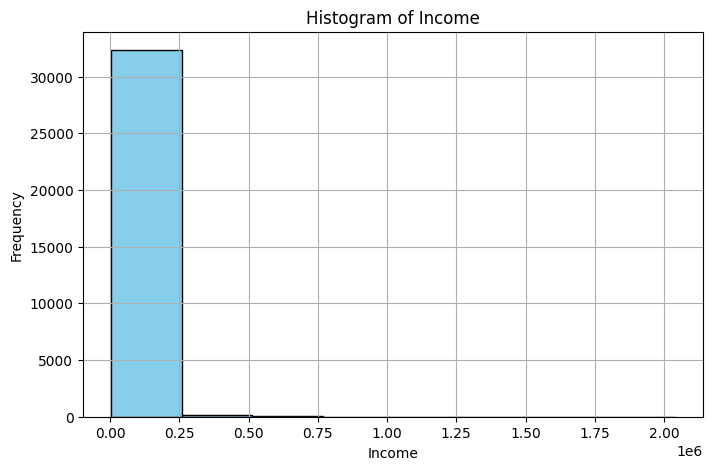

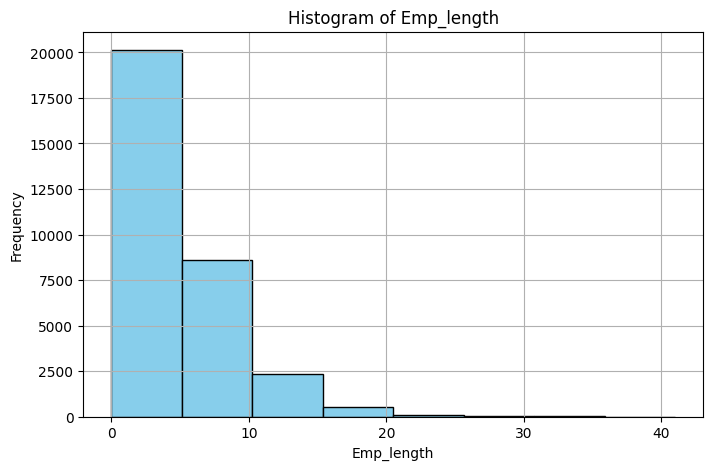

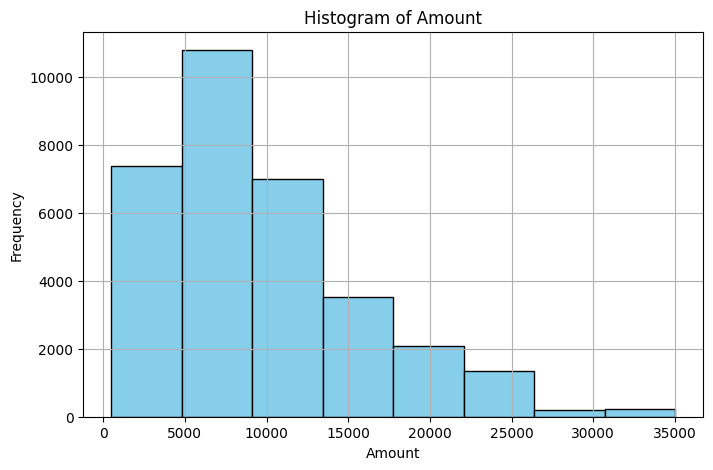

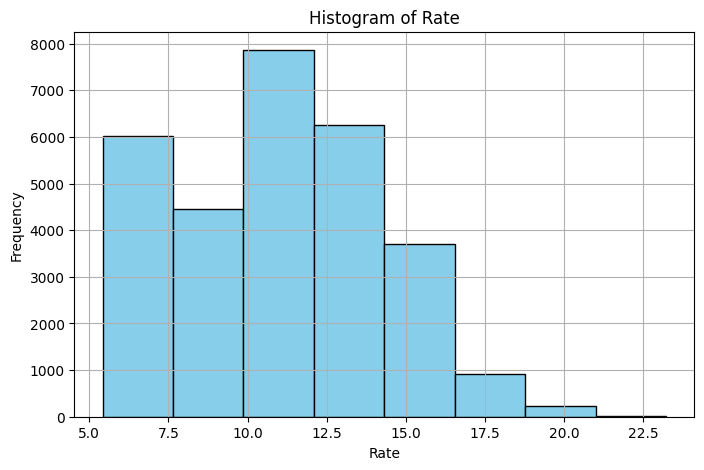

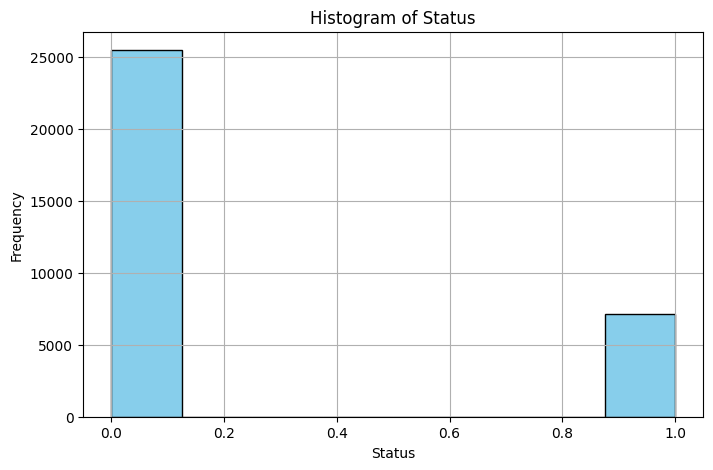

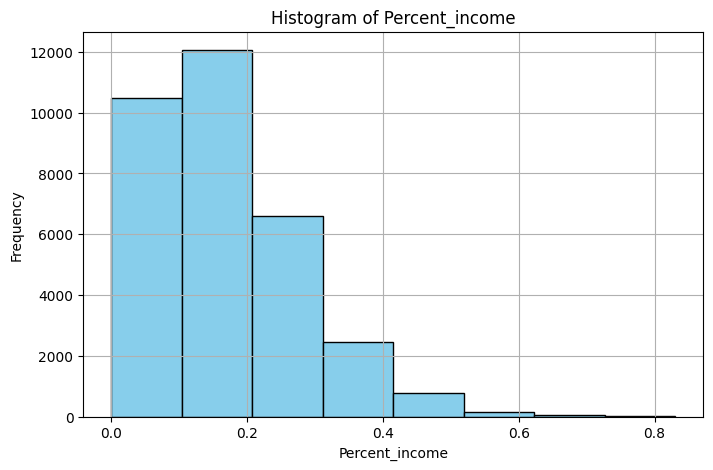

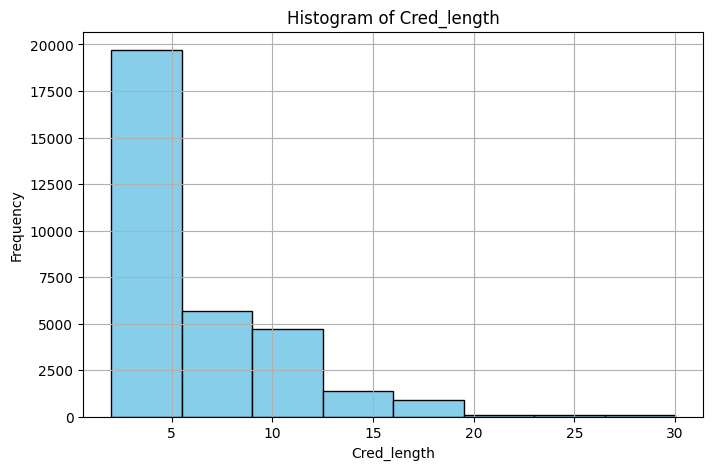

In [ ]:
for column in df.columns:
  if df[column].dtypes != "object":
    plt.figure(figsize=(8, 5))
    plt.hist(df[column], bins=8, color='skyblue', edgecolor='black')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title('Histogram of ' + column)
    plt.grid(True)
    plt.show()

# This Histogram tells us that:

 1 - Most of the people who applied for loan where between 20 > age < 35 age group


 2 - All of them had Yearly Income under 50k .


 3 - Most of them got recently employed and applied for loan between 6k to 10k .


 4 - Most of them had Interest Rate between 10% to 14% and most of them didn't get approval .


 5 - Majority of them had less credit length which means less credibility which can be put in question for approval of loan as they may default but there is thing that mostly young people applied for loan and it is given that they would have less credit length.

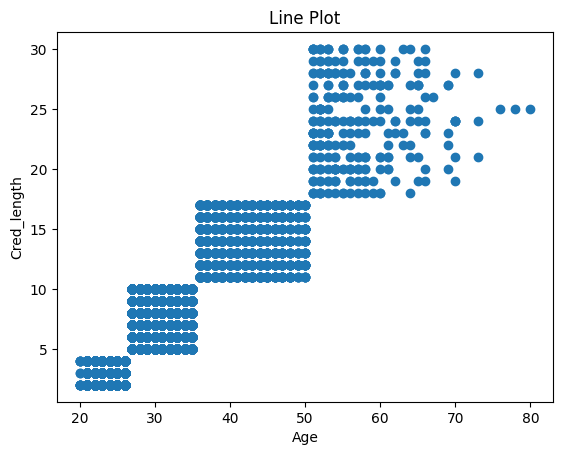

In [ ]:
plt.scatter(df['Age'], df['Cred_length'])

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Cred_length')
plt.title('Line Plot')

# Display the plot
plt.show()

This more clearly shows the trend age and credit length have with each other

In [ ]:
default_approval = df[(df['Status']==1)&(df['Default']=="Y")]
default_approval.shape

(2171, 11)

In [ ]:
df.Status.value_counts()

0    25465
1     7107
Name: Status, dtype: int64

In [ ]:
#calculation percentage of positive approvals with having a history of default
percent =  7107/(2171*100)
percent*100

3.27360663288807

This show that almost 3.3% of approval for loan were given to people having previous defaults

Lets check relationship between columns of people having previous defaults and non-defaults having approval

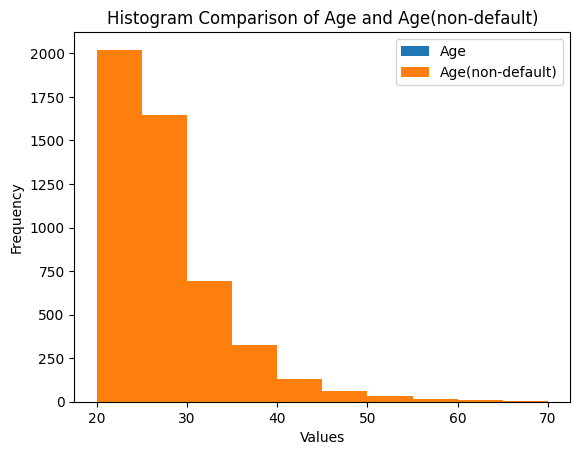

<Figure size 1000x500 with 0 Axes>

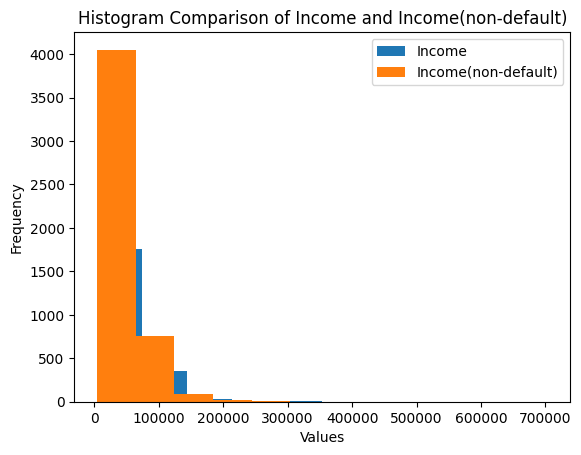

<Figure size 1000x500 with 0 Axes>

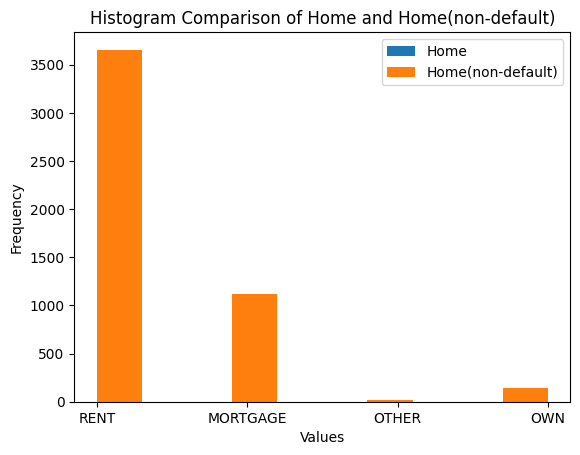

<Figure size 1000x500 with 0 Axes>

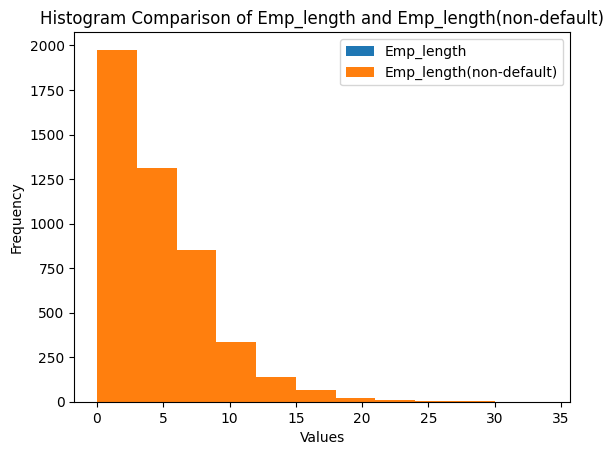

<Figure size 1000x500 with 0 Axes>

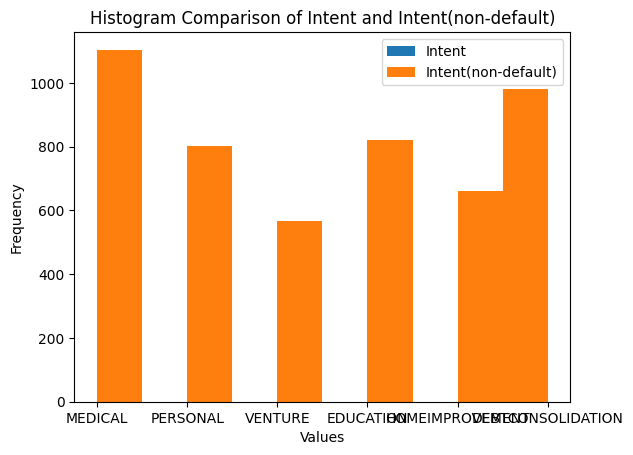

<Figure size 1000x500 with 0 Axes>

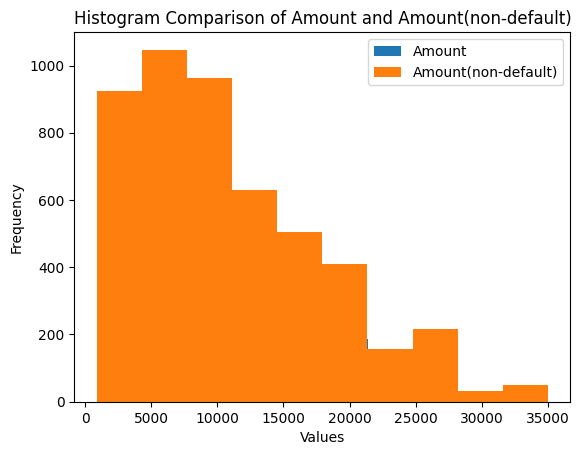

<Figure size 1000x500 with 0 Axes>

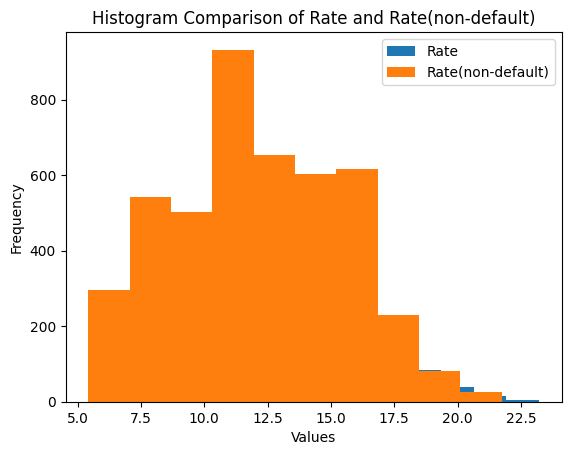

<Figure size 1000x500 with 0 Axes>

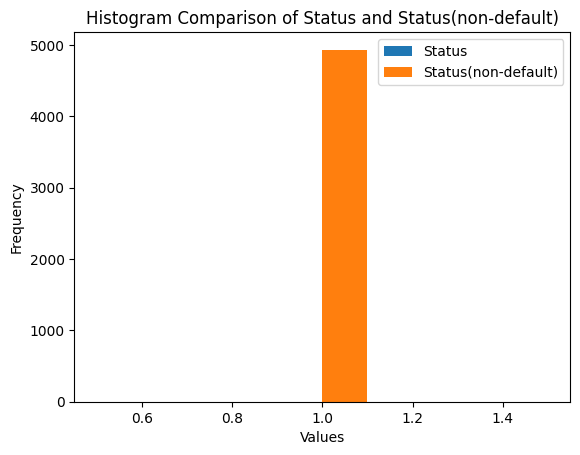

<Figure size 1000x500 with 0 Axes>

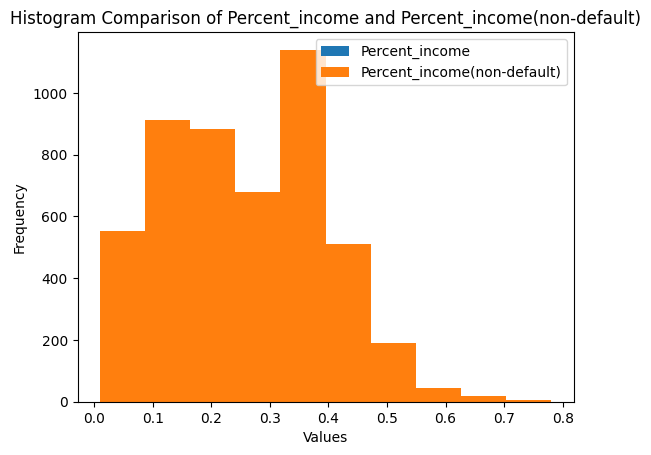

<Figure size 1000x500 with 0 Axes>

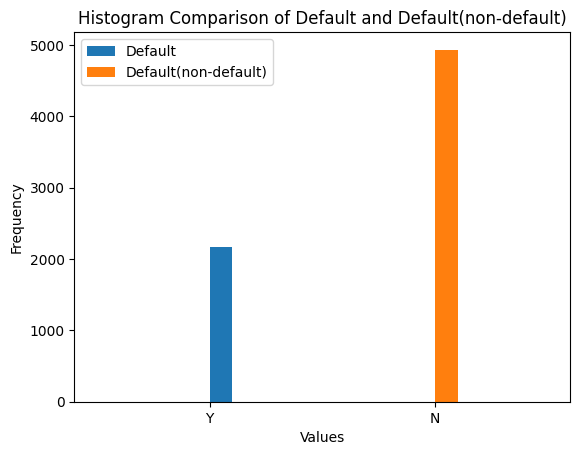

<Figure size 1000x500 with 0 Axes>

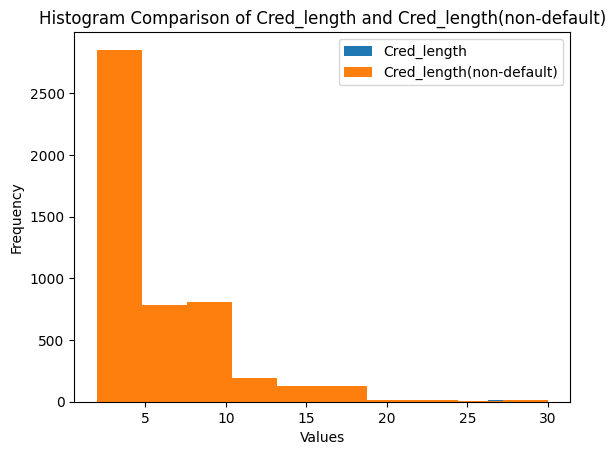

<Figure size 1000x500 with 0 Axes>

In [ ]:
non_default_approval = df[(df['Status']==1)&(df['Default']=="N")]
for column in default_approval.columns:
  fig, ax = plt.subplots()
  plt.figure(figsize=(10, 5))

# Plot histogram for column 1
  ax.hist(default_approval[column], alpha=1, label=column)

# Plot histogram for column 2
  ax.hist(non_default_approval[column], alpha=1, label=(str(column)+"(non-default)"))

# Add labels and title
  ax.set_xlabel('Values')
  ax.set_ylabel('Frequency')
  ax.set_title('Histogram Comparison of {} and {}'.format(column,(str(column)+"(non-default)")))

  ax.legend()

  plt.show()

There is no extraordinary feature in people with defaults and having approval with people having approvals and no previous default.

In [ ]:
##Handling Nan-Values
from sklearn.impute import SimpleImputer

In [ ]:
imputer = SimpleImputer(strategy="mean")

In [ ]:
imputer.fit(df[["Rate"]])
df["Rate"]=imputer.transform(df[["Rate"]])

In [ ]:
imputer.fit(df[["Emp_length"]])
df["Emp_length"]=imputer.transform(df[["Emp_length"]])

In [ ]:
df.isnull().value_counts()

Age    Income  Home   Emp_length  Intent  Amount  Rate   Status  Percent_income  Default  Cred_length
False  False   False  False       False   False   False  False   False           False    False          32572
dtype: int64

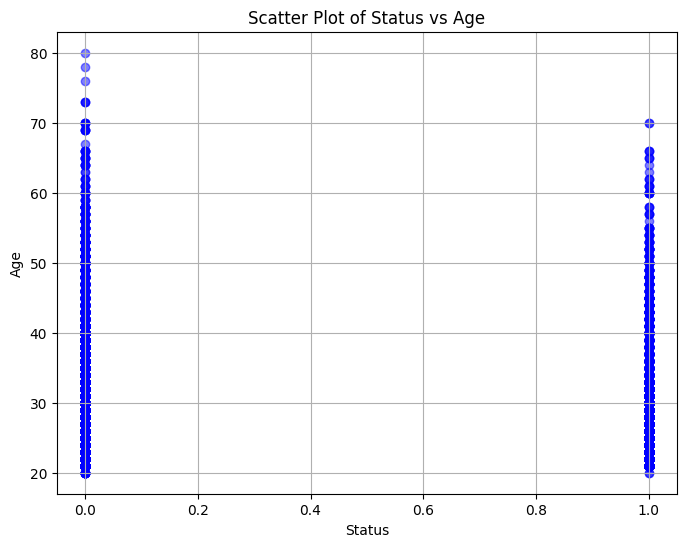

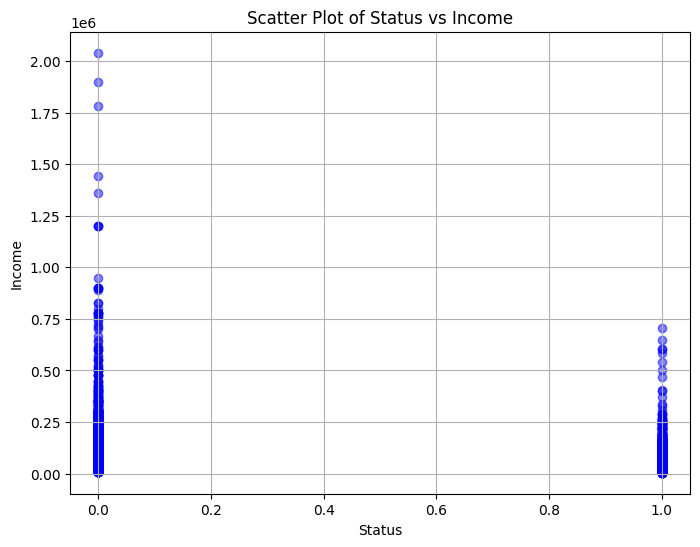

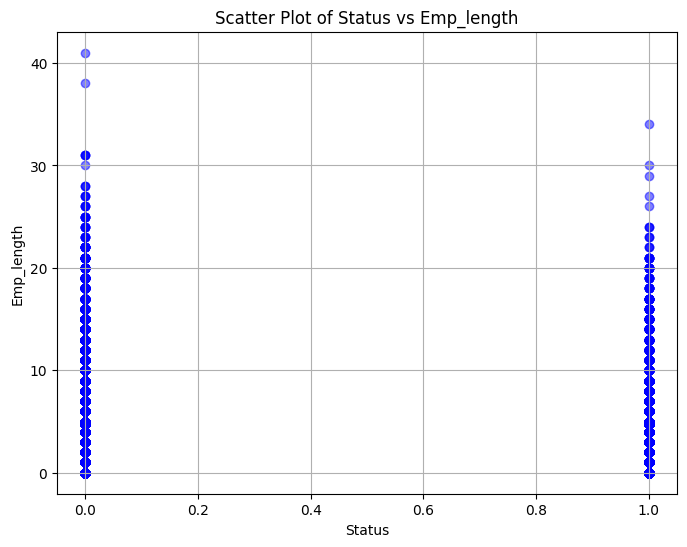

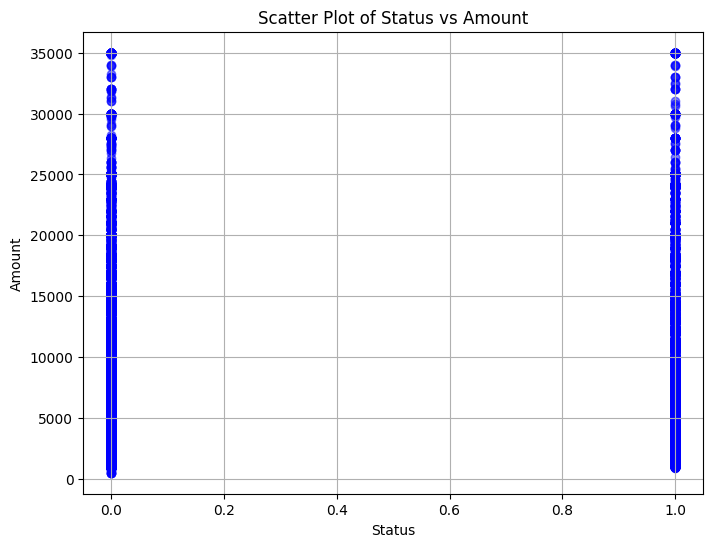

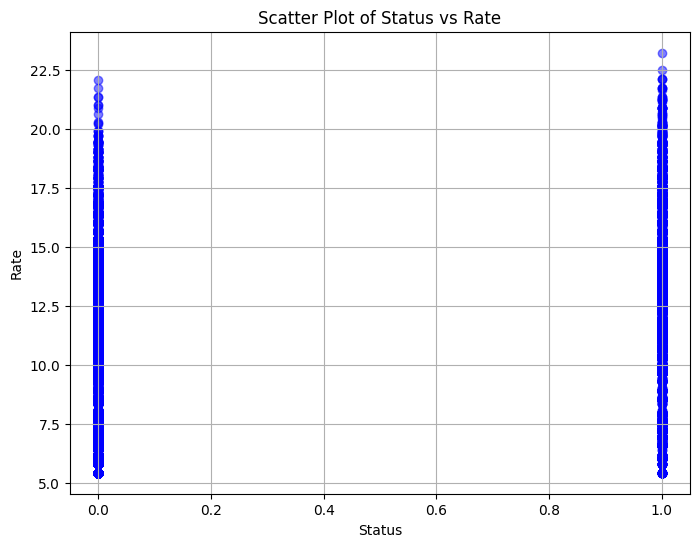

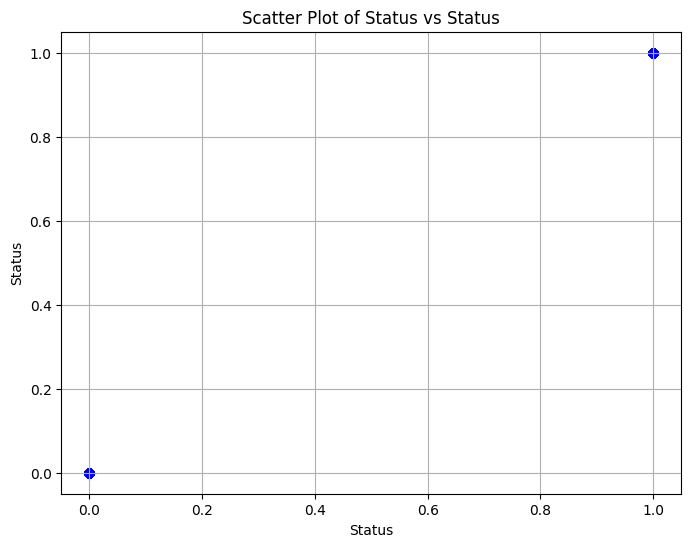

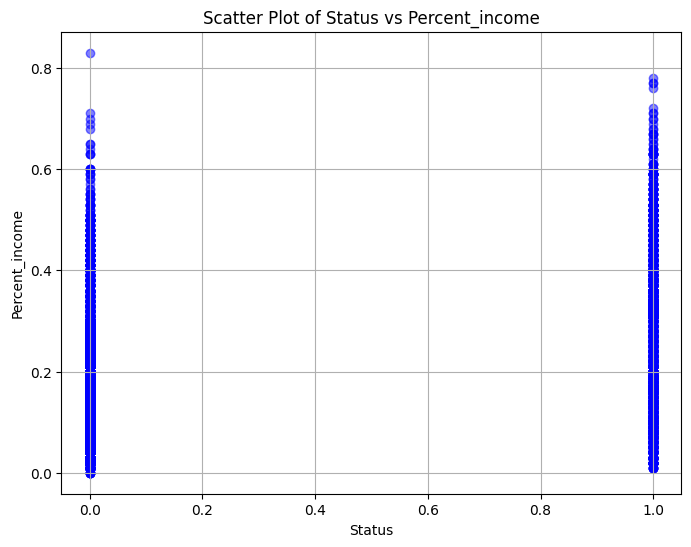

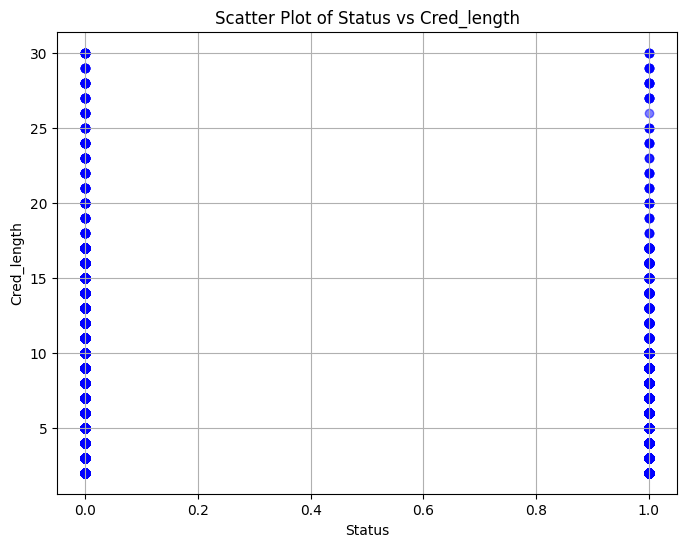

In [ ]:
##Now checking for all the factors relation with Status history
for column in df.columns:
  if df[column].dtypes != "object":
    plt.figure(figsize=(8, 6))
    plt.scatter(df['Status'],df[column], color='blue', alpha=0.5)
    plt.xlabel('Status')
    plt.ylabel(column)
    plt.title('Scatter Plot of ' + 'Status' + ' vs ' + column)
    plt.grid(True)
    plt.show()

<ipython-input-31-a0b7637ac865>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap="viridis",annot=True)


Text(0.5, 1.0, 'Correlation Matrix')

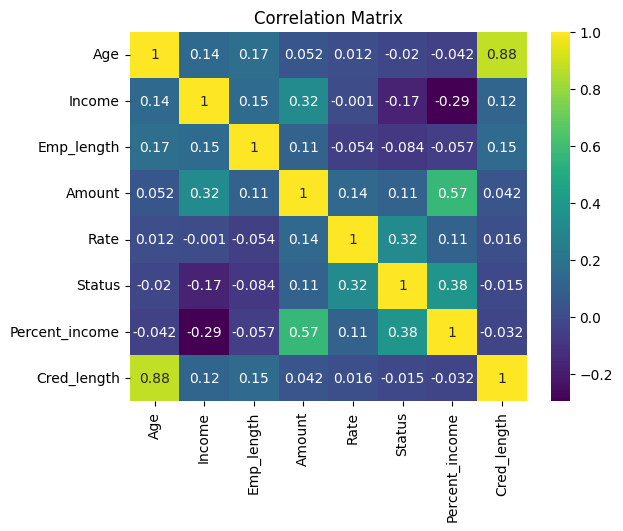

In [ ]:
#Lets check correlation
sns.heatmap(df.corr(),cmap="viridis",annot=True)
plt.title("Correlation Matrix")

This heatmap of correlation the Status have don't even have weak positive relation with any other classes

In [ ]:
#Using One hot encoding on Home to add to this correlation
df_encoded  = pd.get_dummies(df, columns=['Home', 'Intent', 'Default'])


In [ ]:
df_encoded.to_csv('data.csv')

In [ ]:
df_encoded.corr()

,Age,Income,Emp_length,Amount,Rate,Status,Percent_income,Cred_length,Home_MORTGAGE,Home_OTHER,Home_OWN,Home_RENT,Intent_DEBTCONSOLIDATION,Intent_EDUCATION,Intent_HOMEIMPROVEMENT,Intent_MEDICAL,Intent_PERSONAL,Intent_VENTURE,Default_N,Default_Y
Age,1.000000,0.141033,0.171426,0.052050,0.011658,-0.020428,-0.041864,0.878420,0.033215,-0.008453,-0.000766,-0.031324,-0.007646,-0.093161,0.077093,0.021080,0.033862,-0.013582,-0.007526,0.007526
Income,0.141033,1.000000,0.153287,0.317489,-0.001023,-0.168493,-0.294535,0.123192,0.235970,0.011485,-0.044949,-0.209367,0.004919,-0.016718,0.051512,-0.040408,0.007797,0.003966,0.002528,-0.002528
Emp_length,0.171426,0.153287,1.000000,0.109691,-0.054460,-0.084419,-0.057473,0.147909,0.224144,-0.015871,0.026514,-0.233221,-0.001882,-0.038699,0.030378,-0.001690,0.009160,0.010001,0.029712,-0.029712
Amount,0.052050,0.317489,0.109691,1.000000,0.139484,0.105235,0.572448,0.042340,0.130815,0.013502,-0.025923,-0.116341,0.000469,-0.008380,0.043114,-0.024841,-0.001299,-0.000520,-0.038870,0.038870
Rate,0.011658,-0.001023,-0.054460,0.139484,1.000000,0.319292,0.114411,0.015917,-0.128345,0.016677,-0.013071,0.131533,-0.003627,-0.008985,0.019798,0.006771,-0.001874,-0.008503,-0.477111,0.477111
Status,-0.020428,-0.168493,-0.084419,0.105235,0.319292,1.000000,0.379266,-0.015325,-0.187609,0.012540,-0.101991,0.238425,0.071527,-0.055315,0.036585,0.056613,-0.021202,-0.078205,-0.178989,0.178989
Percent_income,-0.041864,-0.294535,-0.057473,0.572448,0.114411,0.379266,1.000000,-0.031543,-0.147953,0.011703,0.051080,0.116733,0.002546,-0.000031,-0.015485,0.012676,-0.004252,0.001568,-0.035623,0.035623
Cred_length,0.878420,0.123192,0.147909,0.042340,0.015917,-0.015325,-0.031543,1.000000,0.024262,-0.006743,0.004748,-0.025685,-0.009007,-0.078662,0.059125,0.015987,0.034985,-0.008535,-0.004776,0.004776
Home_MORTGAGE,0.033215,0.235970,0.224144,0.130815,-0.128345,-0.187609,-0.147953,0.024262,1.000000,-0.048118,-0.246032,-0.846161,0.027454,-0.005608,0.050387,-0.050388,0.010164,-0.020585,0.061544,-0.061544
Home_OTHER,-0.008453,0.011485,-0.015871,0.013502,0.016677,0.012540,0.011703,-0.006743,-0.048118,1.000000,-0.016852,-0.057959,-0.000178,-0.005643,0.000269,-0.004051,-0.000181,0.010188,-0.014262,0.014262


Here we a weak relation of Status with Amount / Rate / Percent_income /Default /Rented Home .

In [ ]:
sns.pairplot(df_encoded, hue='Status')
plt.show()

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7ee2a55381f0> (for post_execute):


KeyboardInterrupt: 

Pair plot show that logistic regression and svm will not work here because of no seprate clustring as it try to sets a best fit line between them so we will use random forest regression and decision trees here.

In [ ]:
X = df_encoded.drop(['Status'], axis="columns")
y = df_encoded['Status']

In [ ]:
X.shape , y.shape

((32572, 19), (32572,))

In [ ]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
model = RandomForestClassifier(n_estimators=100)

In [ ]:
model.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
model.score(X_test,y_test)

0.9220260936300845

In [ ]:
unit=X_test[0:1].values.tolist()
unit

[[24.0,
  82000.0,
  1.0,
  7500.0,
  8.32,
  0.09,
  3.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0]]

In [ ]:
model.predict(unit)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0])

In [ ]:
y_predict=model.predict(X_test)
y_predict

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test , y_predict)
print(cm)

[[5054   58]
 [ 450  953]]


In confusion matrix 5045 values were predicted correctly when loan was not approved

And 963 Values were predicted correct of approval of loan.

While 60 values of approval were predicted as not approved.

And 447 values of not approved were predicted as approval.






Text(50.722222222222214, 0.5, 'Predicted')

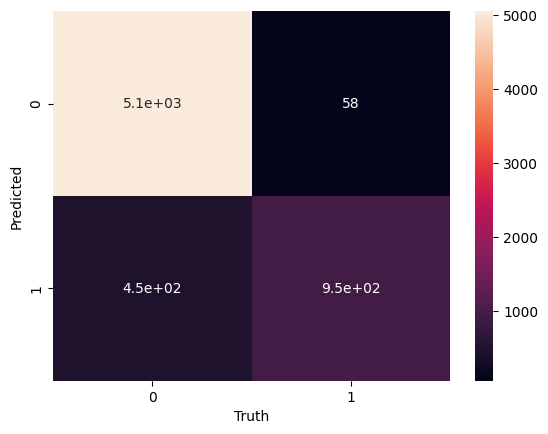

In [ ]:
sns.heatmap(cm , annot=True)
plt.xlabel("Truth")
plt.ylabel("Predicted")

Precision:

Imagine you have a basket of fruits, and you want to pick only apples from it. Precision tells you how many of the fruits you picked were actually apples.
Mathematically, precision is the ratio of correctly identified apples to all the fruits you picked (both apples and non-apples). A high precision means you are good at picking only apples and not mistakenly picking other fruits as apples.
Accuracy:

Accuracy is like taking a test where you want to answer as many questions correctly as possible. It tells you the overall proportion of correct answers you gave.
Mathematically, accuracy is the ratio of correctly answered questions to all the questions asked. A high accuracy means you answered most of the questions correctly.
Recall:

Continuing with the test analogy, recall is like making sure you don't miss any questions that you could answer correctly. It tells you the proportion of correctly answered questions out of all the questions that you should have answered.
Mathematically, recall is the ratio of correctly answered questions to all the questions that should have been answered correctly (including both the correctly and incorrectly answered questions). A high recall means you didn't miss many questions that you should have answered correctly.
F1 Score:

The F1 score is a combination of precision and recall. It's like finding a balance between making sure you pick only apples (precision) and making sure you don't miss any apples (recall).
Mathematically, the F1 score is the harmonic mean of precision and recall. It gives equal weight to both precision and recall. A high F1 score means you have a good balance between precision and recall, indicating a reliable model.

In [ ]:
from sklearn.metrics import accuracy_score
print ('Accuracy:', accuracy_score(y_test, y_predict))

Accuracy: 0.9220260936300845


This shows the model has high accuracy which means it gets most of the prediction right.

CV represents cross validation which basically divide the traning into the parts as the value given in cv and its purpose is basically to kill the randomness in the data set occured during splitting it for traning and testing it also reduces the biasness in measure which are used to check the performance of trained model

In [ ]:
precisions = cross_val_score(model, X_train, y_train, cv=5,
scoring='precision')
print ('Precision', np.mean(precisions), precisions)
recalls = cross_val_score(model, X_train, y_train, cv=5,
scoring='recall')
print ('Recalls', np.mean(recalls), recalls)

Precision 0.9341178695158051 [0.93968637 0.93057247 0.93040293 0.93060719 0.93932039]
Recalls 0.6740892107569538 [0.68448729 0.67572305 0.66783523 0.66345311 0.67894737]


High precision score means model is good at predicting results but low recall shows it also make mistakes while doing it but the margin by which the model make mistake can be found out by F1 score

In [ ]:
f1_score = cross_val_score(model, X_train, y_train, cv=5,
scoring='f1')
print ('F1', np.mean(f1_score), f1_score)

F1 0.7822663891812722 [0.79554656 0.78300455 0.77663934 0.76773864 0.78840285]


The F1 score here suggest that there is good balance b/w precision and recall so the margin of error for prediction by model is very low.

We can also tune the hypermeters for forest classifier by setting mutiple parameters ouselves and calculating the results in terms of Accuracy , Precision , Recall and F1 score by using Grid Search

In [ ]:
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [ ]:
pipeline = Pipeline([('clf', RandomForestClassifier(criterion='entropy'))])

In [ ]:
parameters = {
'clf__n_estimators': (50, 100, 150, 200),
'clf__max_depth': (50, 150, 250),
'clf__min_samples_split': (1, 2, 3),
'clf__min_samples_leaf': (1, 2, 3)
}

Here to tune the F1 score the selected hyper parameters are

-n_estimators -> which basically shows the number of decision tree that have to be made.

-max_dept -> this parameter controls the depth of all the decision tree with this we can limit the depth to avoid any chance of overfitting.

-min_sample_split -> this parameter controls the number of time a tree is split by controlling the number of samples required to split a node

-man_samples_leaf -> this sets the parameter for number of samples required to form a leaf node thus un-required growth of tree


All these methods are for generalization in model .

In [ ]:
grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1,verbose=1, scoring='f1')
grid_search.fit(X_train, y_train)
print ('Best score: %0.3f' % grid_search.best_score_)
print ('Best parameters set:')
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
  print ('\t%s: %r' % (param_name, best_parameters[param_name]))
predictions = grid_search.predict(X_test)
print (classification_report(y_test, predictions))

Fitting 5 folds for each of 108 candidates, totalling 540 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
180 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-pac

Best score: 0.783
Best parameters set:
	clf__max_depth: 250
	clf__min_samples_leaf: 1
	clf__min_samples_split: 3
	clf__n_estimators: 200
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      5112
           1       0.95      0.68      0.79      1403

    accuracy                           0.92      6515
   macro avg       0.93      0.84      0.87      6515
weighted avg       0.93      0.92      0.92      6515



#Interpretation of Result done by CHATGPT:


This output provides valuable information regarding the hyperparameter tuning process using GridSearchCV, as well as the resulting classification report. Here's a breakdown of the key information:

Grid Search Process:

The grid search is performed with 108 different combinations of hyperparameters (n_estimators, max_depth, min_samples_leaf, min_samples_split) using 5-fold cross-validation. This results in a total of 540 fits.
Among these fits, 180 failed due to an issue with the min_samples_split parameter of the RandomForestClassifier. The error message indicates that the parameter value must be an integer greater than or equal to 2, but it was set to 1 instead. This issue caused the associated scores to be set to 'nan' (not a number).
Best Model and Parameters:

Despite the failed fits, the grid search still identifies the best performing model based on the F1 score. The best F1 score achieved is 0.783.
The best hyperparameters for the model are:
max_depth: 250
min_samples_leaf: 1
min_samples_split: 3
n_estimators: 200
Classification Report:

After selecting the best model, predictions are made on the test set (X_test), and a classification report is generated.
The classification report shows the precision, recall, F1-score, and support for each class (0 and 1).
The overall accuracy of the model on the test set is 92%.
Interpretation:

The model achieves high precision (0.92) and recall (0.99) for class 0, indicating that it correctly identifies the majority of instances belonging to class 0. However, the recall for class 1 is relatively lower (0.68), indicating that the model misses some instances of class 1.
The F1-score is a harmonic mean of precision and recall and provides a balance between the two metrics. The weighted average F1-score of 0.92 indicates good overall performance of the model.
Overall, while the grid search encountered some issues with certain parameter combinations, it successfully identified the best performing model, which achieved satisfactory performance on the test set.







#**Now Using Decision Tree For Same Test And Traning Set**

In [59]:
from sklearn.tree import DecisionTreeClassifier

In [60]:
Decision_Model = DecisionTreeClassifier()

In [61]:
Decision_Model.fit(X_train,y_train)

DecisionTreeClassifier()

In [63]:
Decision_Model.score(X_test,y_test)

0.8808902532617038

In [64]:
y_predicted=Decision_Model.predict(X_test)
y_predicted

array([0, 0, 1, ..., 0, 0, 0])

In [65]:
print ('Accuracy:', accuracy_score(y_test, y_predicted))
precisions = cross_val_score(Decision_Model, X_train, y_train, cv=5,
scoring='precision')
print ('Precision', np.mean(precisions), precisions)
recalls = cross_val_score(Decision_Model, X_train, y_train, cv=5,
scoring='recall')
print ('Recalls', np.mean(recalls), recalls)
f1_score = cross_val_score(Decision_Model, X_train, y_train, cv=5,
scoring='f1')
print ('F1', np.mean(f1_score), f1_score)

Accuracy: 0.9220260936300845
Precision 0.7030899327398157 [0.7146402  0.71186441 0.70032841 0.68977177 0.69884488]
Recalls 0.7386051017113335 [0.75460123 0.74408414 0.74233129 0.70990359 0.74210526]
F1 0.7218428519776932 [0.73558308 0.72781826 0.72186837 0.70176953 0.72217502]


This measures show that Random Forest is much better choice than Decision Tree with having much better accuray , precision , recall and F1 score .

---



---

